# Random Forest MODEL

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, fbeta_score

## Data

In [2]:
full_train = pd.read_csv("../../../data/csev/model_6/fulltrainCSEV.csv")
full_test = pd.read_csv("../../../data/csev/model_6/fulltestCSEV.csv")

In [3]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

0    27794
1    27794
Name: C_SEV, dtype: int64

In [4]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

##  Random Forest Classifier

In [5]:
model = RandomForestClassifier()

In [6]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
Y_pred = model.predict(X_test)

## Evaluation

In [8]:
metrics.accuracy_score(Y_test, Y_pred)

0.6181385581197918

Matriz de confusión
[[  4589   2360]
 [134380 216759]]
Matriz de confusión normalizada
[[0.66038279 0.33961721]
 [0.38269745 0.61730255]]


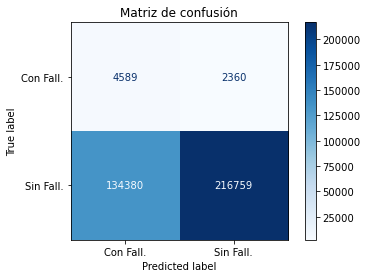

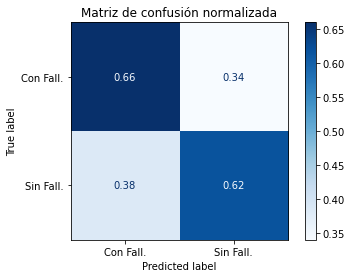

In [9]:
titles_options = [
    ("Matriz de confusión", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [10]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.03      0.66      0.06      6949
           1       0.99      0.62      0.76    351139

    accuracy                           0.62    358088
   macro avg       0.51      0.64      0.41    358088
weighted avg       0.97      0.62      0.75    358088



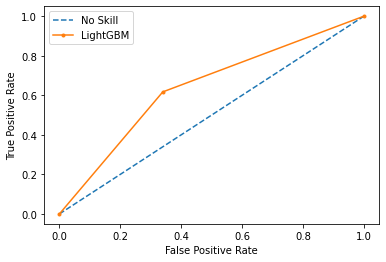

In [13]:
# Curva ROC
# keep probabilities for the positive outcome only
yhat = Y_pred
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LightGBM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [16]:
fbeta_score(Y_test, Y_pred, average='binary', beta=2)

0.667495034412675